# Math 725 Advanced Linear Algebra
## 3D Cube projected into 2D


### Brent A. Thorne

brentathorne@gmail.com

See file: Data/cube.mp4

<video src="Data/cube.mp4"></video>

In [1]:
# import libraries
import numpy as np  
import sympy as sym 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
from IPython.display import display, Math, Latex
import matplotlib.animation as manimation

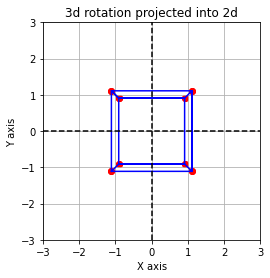

In [2]:
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Rotating Cube', artist='Brent A. Thorne',
                comment='a cube with corners draw with red dots and edges draw with blue lines')
writer = FFMpegWriter(fps=15, metadata=metadata)

# Initialize the movie
fig = plt.figure()

# think of a better way to do this...
# for now we'll just cook up the matrix to show the form
D = np.matrix(([[1,-1,-1, 1,1,  1,-1,-1, 1,  1, 1,-1,-1, -1,-1, 1, 1],\
                [1, 1,-1,-1,1,  1, 1,-1,-1,  1, 1, 1, 1, -1,-1,-1,-1],\
                [1, 1, 1, 1,1, -1,-1,-1,-1, -1, 1, 1,-1, -1, 1, 1,-1],\
                [1, 1, 1, 1,1,  1, 1, 1, 1,  1, 1, 1, 1,  1, 1, 1, 1]]))

def rot(thetaX,thetaY, thetaZ): 
    #rot X
    Tx = np.matrix([[1,0,0,0],\
            [0,np.cos(thetaX),-np.sin(thetaX),0],\
            [0,np.sin(thetaX),np.cos(thetaX),0],\
            [0,0,0,1]])
    #rot Y
    Ty = np.matrix([[np.cos(thetaY),0,np.sin(thetaY),0],\
            [0,1,0,0],\
            [-np.sin(thetaY),0,np.cos(thetaY),0],\
            [0,0,0,1]])

    #rot Z
    Tz = np.matrix([[np.cos(thetaZ),-np.sin(thetaZ),0,0],\
            [np.sin(thetaZ),np.cos(thetaZ),0,0],\
            [0,0,1,0],\
            [0,0,0,1]])
    return(Tz*Ty*Tx) # think about order of operatons here

def myplot(x,y):
    plt.clf()
    title='3d rotation projected into 2d'
    lim = 3
    plt.title(f"{title}"); 
    plt.xlabel("X axis"); 
    plt.ylabel("Y axis")
    plt.scatter(x,y, color ="red")
    plt.plot(x,y, color ="blue")
    plt.xlim(-lim,lim); plt.ylim(-lim,lim)
    plt.grid(); plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', linestyle='--')
    plt.axvline(0, color='black', linestyle='--')
    writer.grab_frame();

d = 10 # distance of projection
P = np.matrix([[1,0,0,0],
               [0,1,0,0],
               [0,0,0,0],
               [0,0,-1/d,1]])
      
# Update the frames for the movie
n = 1000
theta = np.linspace(0, 6*np.pi, n)
with writer.saving(fig, "Data/cube.mp4", 100):
    for i in theta:
        T=rot(i,i/2,0)
        M= P*(T*D)
        H = M[3]
        N = np.divide(M,H)[0:2]
        x,=N[0].tolist()
        y,=N[1].tolist()
        #plt.plot(x,y, color ="blue")
        myplot(x,y);

In [3]:
# display generated movie in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="Data/cube.mp4" type="video/mp4">
</video></div>""")